This notebook is for running our finetuned_v1 yolov8s model (finetuned on our first batch of hand-labeled data) on more collected data (582 images) to ease the data labeling process. We will then use roboflow to clean the automatically labeled data and adjust the bounding boxes as well as add annotations for items that are missed or not detected from the auto-label run. After the data is cleaned, we'll train our v2 model on the new dataset that is now from 199 images to ~780 images.

In [1]:
!pip install ultralytics
!pip install supervision==0.24.0
!pip install PyYAML

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 982.4/982.4 kB 61.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 127.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 93.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 70.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 45.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 20.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 113.3 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninst

In [7]:
!cp "/content/drive/MyDrive/Walmart_AI_Project/yolo_autolabeled_dataset.zip" "/content/"

In [8]:
!unzip /content/yolo_autolabeled_dataset.zip -d /content/yolo_autolabeled_dataset

Archive:  /content/yolo_autolabeled_dataset.zip
   creating: /content/yolo_autolabeled_dataset/4.21data/
  inflating: /content/yolo_autolabeled_dataset/4.21data/20250420_185316.jpg  
  inflating: /content/yolo_autolabeled_dataset/4.21data/20250420_185317.jpg  
  inflating: /content/yolo_autolabeled_dataset/4.21data/20250420_185318.jpg  
  inflating: /content/yolo_autolabeled_dataset/4.21data/20250420_185319.jpg  
  inflating: /content/yolo_autolabeled_dataset/4.21data/20250420_185320.jpg  
  inflating: /content/yolo_autolabeled_dataset/4.21data/20250420_185321.jpg  
  inflating: /content/yolo_autolabeled_dataset/4.21data/20250420_185322.jpg  
  inflating: /content/yolo_autolabeled_dataset/4.21data/20250420_185323(0).jpg  
  inflating: /content/yolo_autolabeled_dataset/4.21data/20250420_185323.jpg  
  inflating: /content/yolo_autolabeled_dataset/4.21data/20250420_185324.jpg  
  inflating: /content/yolo_autolabeled_dataset/4.21data/20250420_185325.jpg  
  inflating: /content/yolo_autolab

In [ ]:
!unzip /content/hard_test.zip -d /content/
!unzip /content/vid_test.zip -d /content/

Archive:  /content/hard_test.zip
   creating: /content/hard_test/
  inflating: /content/hard_test/20250418_165247.jpg  
  inflating: /content/hard_test/20250418_165249.jpg  
  inflating: /content/hard_test/20250418_165637.jpg  
  inflating: /content/hard_test/20250418_165640.jpg  
  inflating: /content/hard_test/20250418_171832.jpg  
  inflating: /content/hard_test/20250418_171836.jpg  
Archive:  /content/vid_test.zip
   creating: /content/vid_test/
  inflating: /content/vid_test/test1.mp4  
  inflating: /content/vid_test/test2.mp4  
  inflating: /content/vid_test/test3.mp4  
  inflating: /content/vid_test/test4.mp4  


In [ ]:
!cp "/content/drive/MyDrive/Walmart_AI_Project/testing_set_roboflow.zip" "/content/"

In [ ]:
!unzip /content/testing_set_roboflow.zip -d /content/

Archive:  /content/testing_set_roboflow.zip
   creating: /content/testing_set_roboflow/
  inflating: /content/testing_set_roboflow/APPLES_MD_100.jpg  
  inflating: /content/testing_set_roboflow/APPLES_MD_101.jpg  
  inflating: /content/testing_set_roboflow/APPLES_MD_102.jpg  
  inflating: /content/testing_set_roboflow/APPLES_MD_104.jpg  
  inflating: /content/testing_set_roboflow/APPLES_MD_106.jpg  
  inflating: /content/testing_set_roboflow/APPLES_MD_107.jpg  
  inflating: /content/testing_set_roboflow/APPLES_MD_108.jpg  
  inflating: /content/testing_set_roboflow/APPLES_MD_110.jpg  
  inflating: /content/testing_set_roboflow/APPLES_MD_112.jpg  
  inflating: /content/testing_set_roboflow/APPLES_MD_113.jpg  
  inflating: /content/testing_set_roboflow/APPLES_MD_114.jpg  
  inflating: /content/testing_set_roboflow/APPLES_MD_115.jpg  
  inflating: /content/testing_set_roboflow/APPLES_MD_116.jpg  
  inflating: /content/testing_set_roboflow/APPLES_MD_117.jpg  
  inflating: /content/testing_

In [9]:
!rm -rf /content/runs/detect/generate_yolo_labels/labels

Run detection to annotate the new collected data.

In [12]:
from ultralytics import YOLO
import os
import shutil

# Load YOLOv8 model
model_path = '/content/model_weights/best.pt'
model = YOLO(model_path)
print(f"Loaded model: {model_path}")

image_source_dir = '/content/yolo_autolabeled_dataset/4.21data'

# Output dirs
output_project_dir = 'runs/detect' # Parent directory for runs
output_run_name = 'generate_yolo_labels' # Specific name for this run
output_run_dir = os.path.join(output_project_dir, output_run_name)

confidence_threshold = 0.5


print(f"\nRunning prediction on images in: {image_source_dir}")
print(f"Saving results to run directory: {os.path.abspath(output_run_dir)}")
print(f"Saving annotations with confidence > {confidence_threshold}")

# Run prediction
results = model.predict(
    source=image_source_dir, # Directory with images (recursive)
    save_txt=True,         # Save labels in YOLO format
    save_conf=False,       # False for standard YOLO format (class_id x y w h)
                            # Set True to include confidence score as 6th column
    conf=confidence_threshold,
    project=output_project_dir, # Directory to save runs
    name=output_run_name,      # Subdirectory name for this run
    exist_ok=True,        # Overwrite previous run with the same name
    save=False,           # False if you need the .txt labels
    stream=False
)

print("\nPrediction complete.")

# Verify label directory
label_save_dir = os.path.join(output_run_dir, 'labels')
if os.path.isdir(label_save_dir):
    label_files = [f for f in os.listdir(label_save_dir) if f.endswith('.txt')]
    print(f"YOLO format label files (.txt) saved in: '{label_save_dir}'")
    print(f"Generated {len(label_files)} label file(s).")

else:
    print(f"\nWarning: Label directory '{label_save_dir}' was not created.")
    print("This might happen if no detections met the confidence threshold "
          f"({confidence_threshold}) in any image.")

Loaded model: /content/model_weights/best.pt

Running prediction on images in: /content/yolo_autolabeled_dataset/4.21data
Saving results to run directory: /content/runs/detect/generate_yolo_labels
Saving annotations with confidence > 0.5

image 1/582 /content/yolo_autolabeled_dataset/4.21data/20250420_185316.jpg: 480x640 2 LEMONSs, 8.6ms
image 2/582 /content/yolo_autolabeled_dataset/4.21data/20250420_185317.jpg: 480x640 2 LEMONSs, 10.3ms
image 3/582 /content/yolo_autolabeled_dataset/4.21data/20250420_185318.jpg: 480x640 2 LEMONSs, 8.0ms
image 4/582 /content/yolo_autolabeled_dataset/4.21data/20250420_185319.jpg: 480x640 2 LEMONSs, 8.2ms
image 5/582 /content/yolo_autolabeled_dataset/4.21data/20250420_185320.jpg: 480x640 3 LEMONSs, 8.1ms
image 6/582 /content/yolo_autolabeled_dataset/4.21data/20250420_185321.jpg: 480x640 2 LEMONSs, 8.3ms
image 7/582 /content/yolo_autolabeled_dataset/4.21data/20250420_185322.jpg: 480x640 2 LEMONSs, 8.1ms
image 8/582 /content/yolo_autolabeled_dataset/4.21dat

Visualize the annotations from running inference on the new data.

Loaded 7 class names: ['APPLES', 'AVOCADOS', 'LEMONS', 'LIMES', 'ORANGE_PEPPER', 'RED_PEPPER', 'TOMATOES']

Searching for images in: /content/test_images
Found 5 image files.

Starting visualization...

--- Visualizing: 20250420_185650.jpg ---
Processed '20250420_185650.jpg', found 2 bounding box(es).


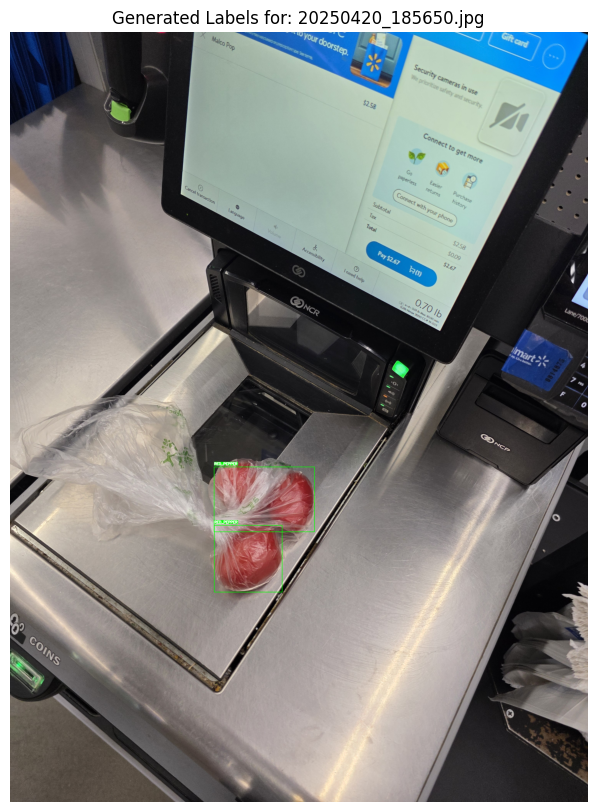


--- Visualizing: 20250420_185832.jpg ---
Processed '20250420_185832.jpg', found 1 bounding box(es).


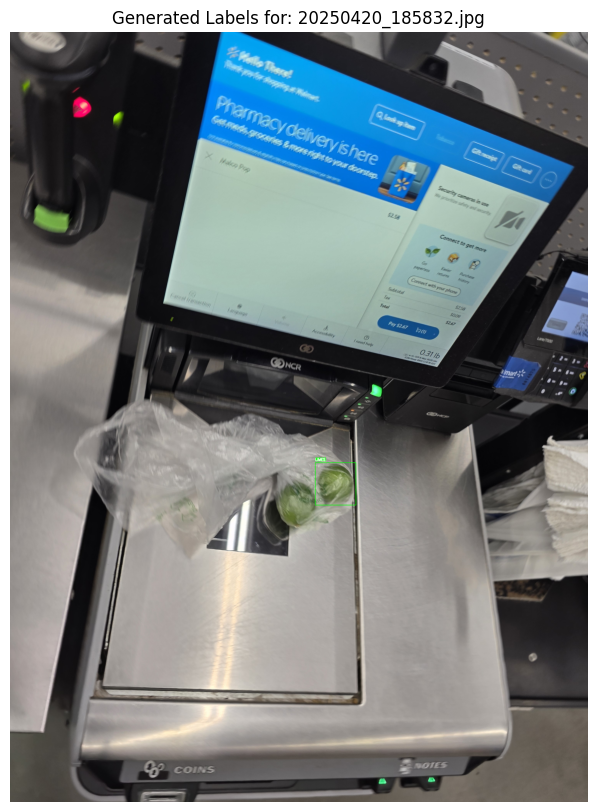


--- Visualizing: 20250420_185630(0).jpg ---
Processed '20250420_185630(0).jpg', found 1 bounding box(es).


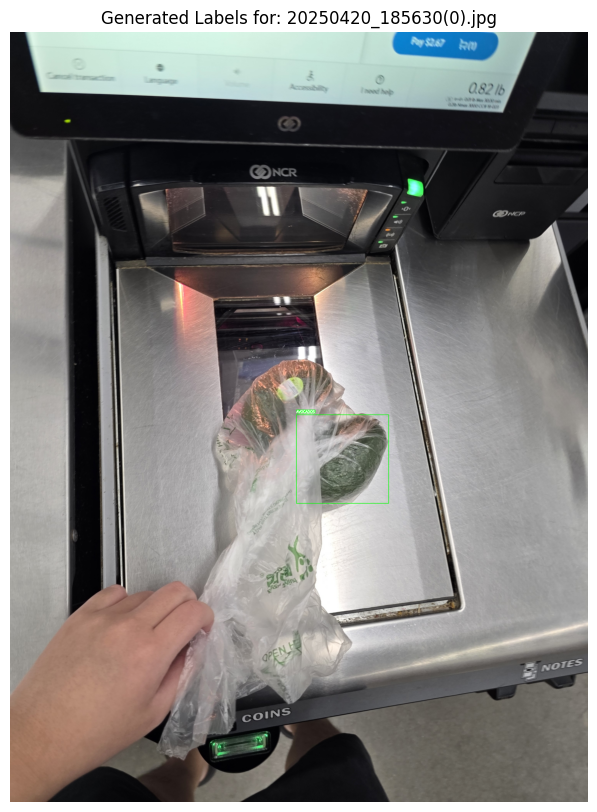


--- Visualizing: 20250420_185316.jpg ---
Processed '20250420_185316.jpg', found 2 bounding box(es).


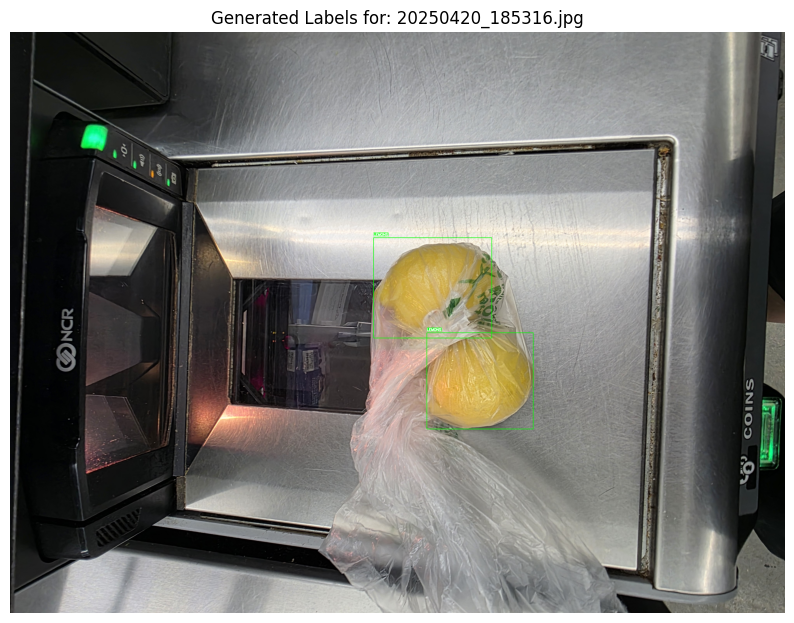


--- Visualizing: 20250420_185542.jpg ---
Processed '20250420_185542.jpg', found 1 bounding box(es).


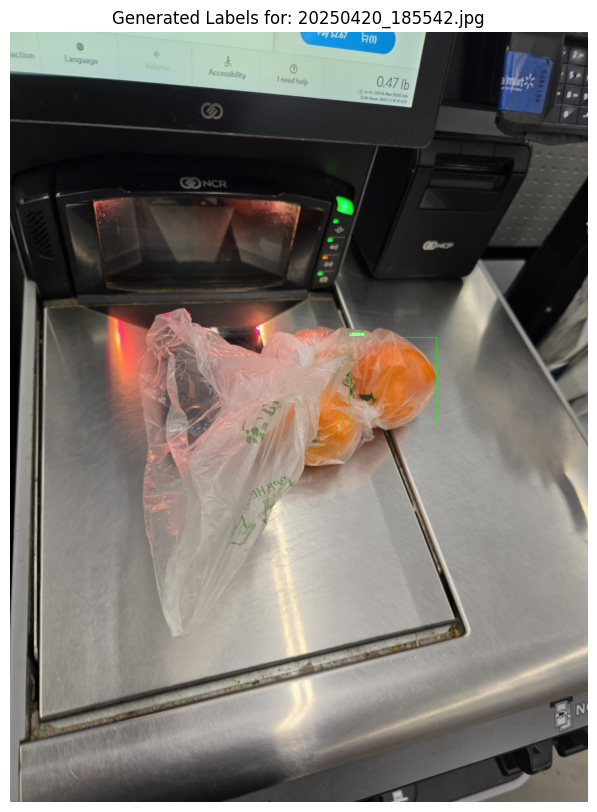


--- Visualization complete ---


In [5]:
import os
import cv2
import yaml
import matplotlib.pyplot as plt
import numpy as np
import glob # To find image files

# Directory where the original images are stored
image_source_dir = '/content/test_images'

# Directory where the labels were saved from running inference above.
label_save_dir = '/content/runs/detect/generate_yolo_labels/labels'

# Path to the data.yaml file corresponding to the model
yaml_file_path = '/content/data.yaml'

# Supported image extensions to look for
image_extensions = ["*.jpg"]

max_images_to_display = 5

BOX_COLOR = (0, 255, 0) # Green in BGR
TEXT_COLOR = (255, 255, 255) # White
TEXT_BG_COLOR = (0, 255, 0) # Green background for text
BOX_THICKNESS = 2
FONT_SCALE = 0.6
FONT_FACE = cv2.FONT_HERSHEY_SIMPLEX

# Helper Function for Visualization
def visualize_yolo_labels(image_path, label_path, class_names):
    """Loads image and label, draws boxes/labels, returns annotated image."""
    if not os.path.exists(image_path):
        print(f"  Skipping: Image file not found: {image_path}")
        return None

    image_bgr = cv2.imread(image_path)
    if image_bgr is None:
        print(f"  Skipping: Failed to load image: {image_path}")
        return None

    H, W = image_bgr.shape[:2]
    vis_image = image_bgr.copy() # Draw on a copy
    bbox_count = 0

    if not os.path.exists(label_path):
        print(f"  Info: Label file not found for this image: {label_path}")
    else:
        with open(label_path, 'r') as f: lines = f.readlines()
        if lines:
            for line in lines:
                parts = line.strip().split()
                if len(parts) >= 5:
                    class_id = int(parts[0])
                    x_c, y_c, w_n, h_n = map(float, parts[1:5])

                    # Denormalize
                    box_w=w_n*W; box_h=h_n*H; x_c_p=x_c*W; y_c_p=y_c*H
                    x_min=max(0, int(x_c_p - box_w / 2)); y_min=max(0, int(y_c_p - box_h / 2))
                    x_max=min(W - 1, int(x_c_p + box_w / 2)); y_max=min(H - 1, int(y_c_p + box_h / 2))

                    # Get class name
                    label_name = f"ID {class_id}"
                    if 0 <= class_id < len(class_names):
                        label_name = class_names[class_id]
                    else:
                        print(f"    Warning: Invalid class_id {class_id} found in {os.path.basename(label_path)}.")

                    # Draw box
                    cv2.rectangle(vis_image, (x_min, y_min), (x_max, y_max), BOX_COLOR, BOX_THICKNESS)
                    # Draw label text with background
                    label_text = f"{label_name}"
                    (tw, th), _ = cv2.getTextSize(label_text, FONT_FACE, FONT_SCALE, BOX_THICKNESS)
                    text_y_pos = y_min - 10
                    bg_y_min = text_y_pos - th - 2 # Padding
                    if bg_y_min < 0 : # If text would go off screen top, draw below
                        text_y_pos = y_max + th + 10
                        bg_y_min = y_max + 2

                    cv2.rectangle(vis_image, (x_min, bg_y_min), (x_min + tw, text_y_pos + 2), TEXT_BG_COLOR, -1) # Background
                    cv2.putText(vis_image, label_text, (x_min, text_y_pos), FONT_FACE, FONT_SCALE, TEXT_COLOR, BOX_THICKNESS, cv2.LINE_AA)
                    bbox_count += 1

                else: print(f"Warning: Incorrect format in line: '{line.strip()}'. Skipping."); continue

    print(f"Processed '{os.path.basename(image_path)}', found {bbox_count} bounding box(es).")
    return vis_image


# Load class names from data.yaml
class_names = []
with open(yaml_file_path, 'r') as f:
    data_yaml = yaml.safe_load(f)
    if isinstance(data_yaml, dict) and 'names' in data_yaml and isinstance(data_yaml['names'], list):
        class_names = data_yaml['names']
        print(f"Loaded {len(class_names)} class names: {class_names}")
    else:
          print(f"Error: 'names' list not found or invalid in {yaml_file_path}")

# Find image files in the source directory
image_files = []
print(f"\nSearching for images in: {image_source_dir}")
if not os.path.isdir(image_source_dir):
     print(f"Error: Source image directory not found: {image_source_dir}")
     exit()

for ext in image_extensions:
    image_files.extend(glob.glob(os.path.join(image_source_dir, ext)))

if not image_files:
     print("No image files found with specified extensions.")
     exit()

print(f"Found {len(image_files)} image files.")

# Limit the number of images to display if needed
if max_images_to_display is not None and len(image_files) > max_images_to_display:
     print(f"Displaying the first {max_images_to_display} images.")
     image_files_to_display = image_files[:max_images_to_display]
else:
     image_files_to_display = image_files

# Loop through images and visualize
print("\nStarting visualization...")
for image_path in image_files_to_display:
    image_filename = os.path.basename(image_path)
    label_filename = os.path.splitext(image_filename)[0] + '.txt'
    label_path = os.path.join(label_save_dir, label_filename)

    print(f"\n--- Visualizing: {image_filename} ---")

    # Call helper function to get annotated image
    annotated_image = visualize_yolo_labels(image_path, label_path, class_names)

    # Display using Matplotlib
    if annotated_image is not None:
        plt.figure(figsize=(10, 10))
        plt.imshow(cv2.cvtColor(annotated_image, cv2.COLOR_BGR2RGB)) # Convert BGR to RGB
        plt.title(f"Generated Labels for: {image_filename}")
        plt.axis('off')
        plt.show()
    else:
         print("  Skipping display due to loading error.")

print("\n--- Visualization complete ---")

Note: The model did help with some of the data labeling, it tracked the shapes and for the most part, did correctly detect which class each item was. We then cleaned this data using roboflow: We manually adjusted the existing bounding boxes and added bounding boxes for items that weren't detected by the finetuned_v1 model. This new dataset will be used to finetune our v2 model.

In [14]:
!zip -r yolov8_finetune1_autolabeled.zip "/content/runs/detect/generate_yolo_labels"

from google.colab import files
files.download('yolov8_finetune1_autolabeled.zip')

updating: content/runs/detect/generate_yolo_labels/ (stored 0%)
updating: content/runs/detect/generate_yolo_labels/labels/ (stored 0%)
updating: content/runs/detect/generate_yolo_labels/labels/20250420_185842.txt (deflated 8%)
updating: content/runs/detect/generate_yolo_labels/labels/20250420_185848.txt (deflated 28%)
updating: content/runs/detect/generate_yolo_labels/labels/20250420_192912.txt (deflated 8%)
updating: content/runs/detect/generate_yolo_labels/labels/20250420_185514.txt (deflated 8%)
updating: content/runs/detect/generate_yolo_labels/labels/20250420_185526.txt (deflated 28%)
updating: content/runs/detect/generate_yolo_labels/labels/20250420_185424.txt (deflated 27%)
updating: content/runs/detect/generate_yolo_labels/labels/20250420_192656.txt (deflated 11%)
updating: content/runs/detect/generate_yolo_labels/labels/20250420_185723.txt (deflated 29%)
updating: content/runs/detect/generate_yolo_labels/labels/20250420_185520.txt (deflated 8%)
updating: content/runs/detect/ge

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
!zip -r roboflow_test_Full.zip "/content/runs/detect/roboflow_dataset_yolov8s_test_predictions"

from google.colab import files
files.download('roboflow_test_Full.zip')

  adding: content/runs/detect/roboflow_dataset_yolov8s_test_predictions/ (stored 0%)
  adding: content/runs/detect/roboflow_dataset_yolov8s_test_predictions/REDPEPPER_MD_103.jpg (deflated 1%)
  adding: content/runs/detect/roboflow_dataset_yolov8s_test_predictions/REDPEPPER_MD_28.jpg (deflated 1%)
  adding: content/runs/detect/roboflow_dataset_yolov8s_test_predictions/APPLES_MD_127.jpg (deflated 1%)
  adding: content/runs/detect/roboflow_dataset_yolov8s_test_predictions/LEMON_CART_HD_16.jpg (deflated 3%)
  adding: content/runs/detect/roboflow_dataset_yolov8s_test_predictions/APPLES_MD_132.jpg (deflated 1%)
  adding: content/runs/detect/roboflow_dataset_yolov8s_test_predictions/APPLES_MD_59.jpg (deflated 1%)
  adding: content/runs/detect/roboflow_dataset_yolov8s_test_predictions/APPLES_MD_69.jpg (deflated 1%)
  adding: content/runs/detect/roboflow_dataset_yolov8s_test_predictions/AVOCADO_CART_HD_1.jpg (deflated 3%)
  adding: content/runs/detect/roboflow_dataset_yolov8s_test_predictions/A

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from google.colab import files
files.download('roboflow_test2.zip')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>